In [1]:
import sys
sys.path.append("../functions")
from GS_data1d import intensity_profile, construct_DM1d, propagation_dm1d
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import eigh

In [2]:
focal_series = loadmat("../data/experiment_STO_focalseries_3BC.mat")["sreels"]
n_row, n_df = focal_series.shape
a = 3.905; energy = 300e3; n_repeat = 8
rx = np.linspace(-a*n_repeat/2, a*n_repeat/2, n_row)
sampling = rx[1] - rx[0]
defocus = np.arange(-32, 32, 2)*10
dm_rec, drift_list, stack_1dp = construct_DM1d(rx, focal_series, defocus, sampling, energy, n_iter=1000, drift_corr=True)

  0%|          | 1/1000 [00:00<02:32,  6.57it/s]/Users/zhangyuxuan/Library/CloudStorage/OneDrive-CityUniversityofHongKong-Student/Wigner function approach/Formal_files/workflow/../functions/GS_data1d.py:29: RuntimeWarning: invalid value encountered in divide
  result = np.fft.ifft(prod/np.abs(prod))
100%|██████████| 1000/1000 [02:29<00:00,  6.71it/s]


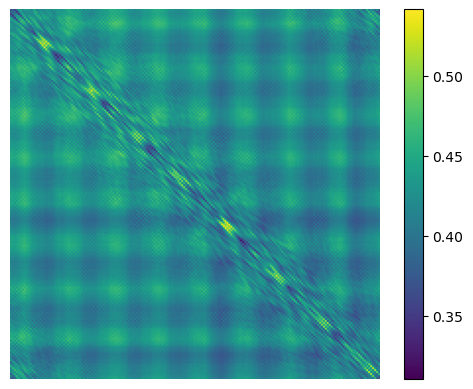

In [3]:
plt.imshow(np.abs(dm_rec))
plt.colorbar()
plt.axis("off")
plt.show()

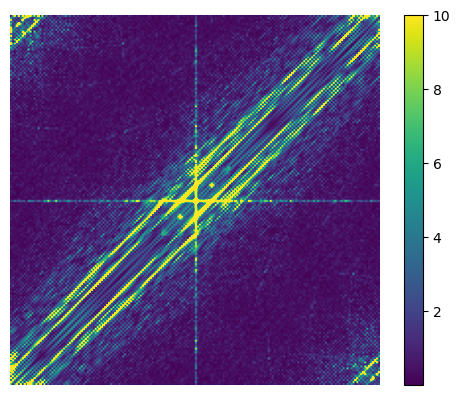

In [12]:
kdm_rec = np.fft.fft2(dm_rec)
plt.imshow(np.abs(np.fft.fftshift(kdm_rec)), vmax=10)
plt.colorbar()
plt.axis("off")
plt.show()

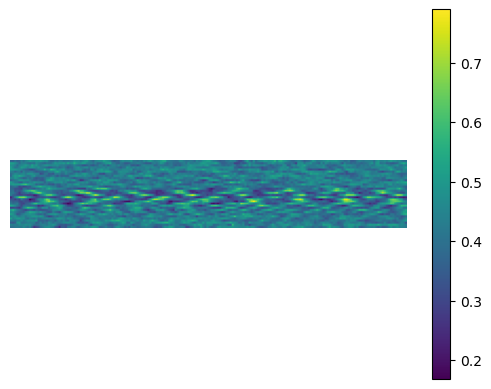

In [5]:
plt.imshow(stack_1dp.T)
plt.colorbar()
plt.axis("off")
plt.show()

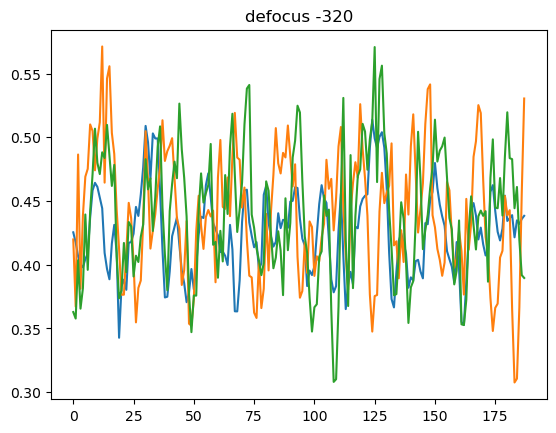

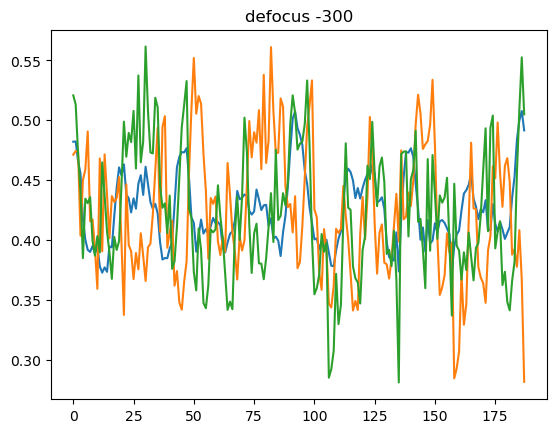

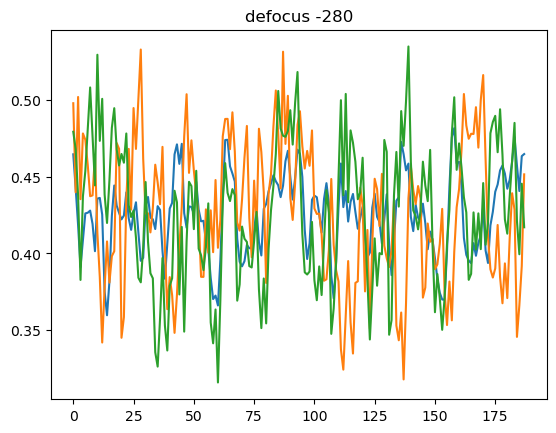

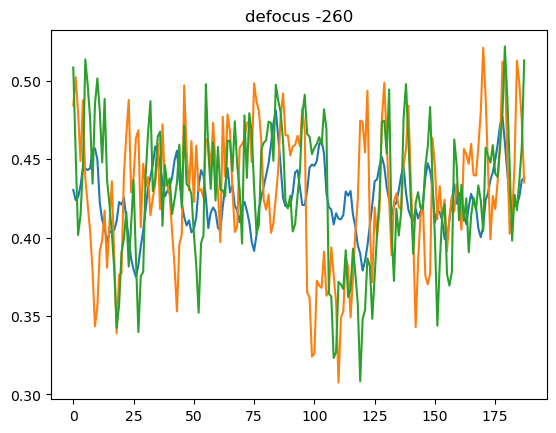

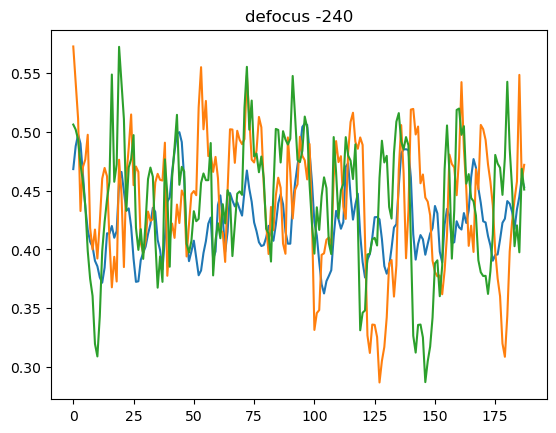

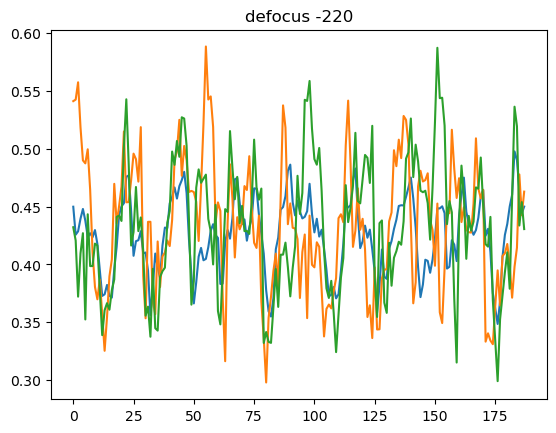

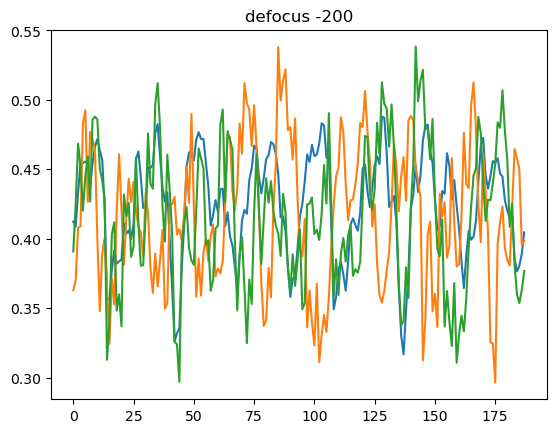

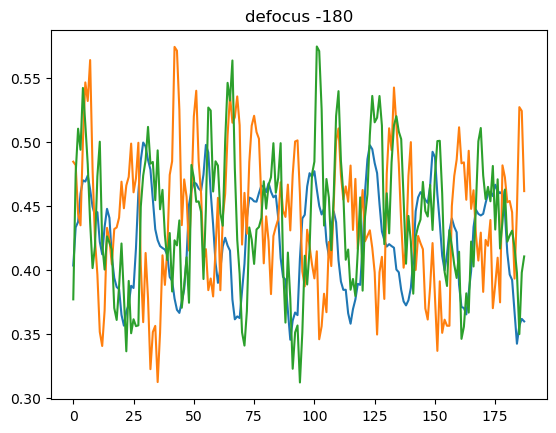

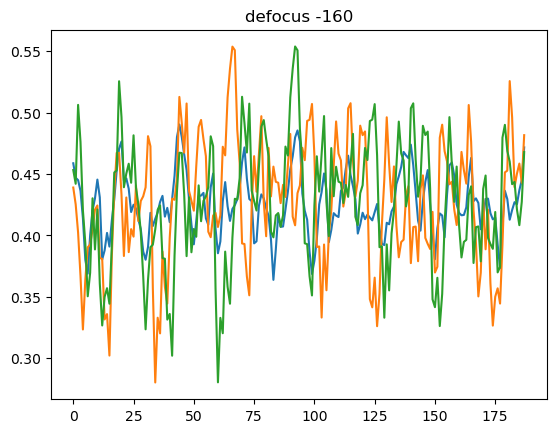

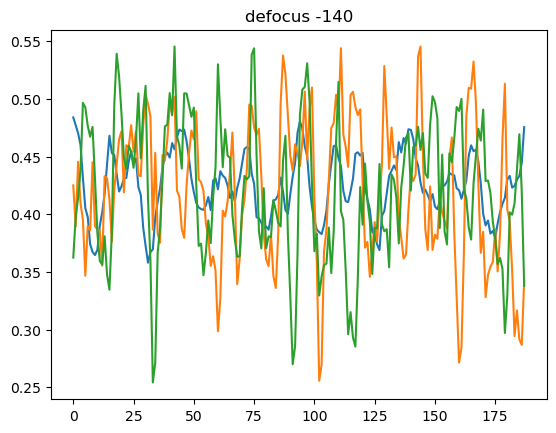

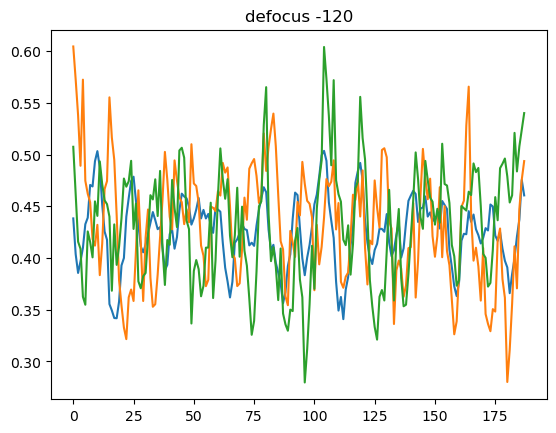

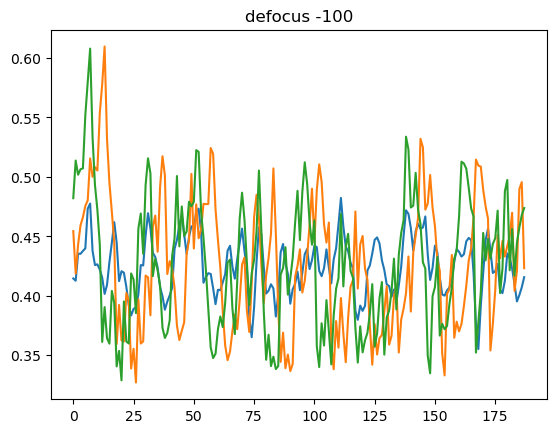

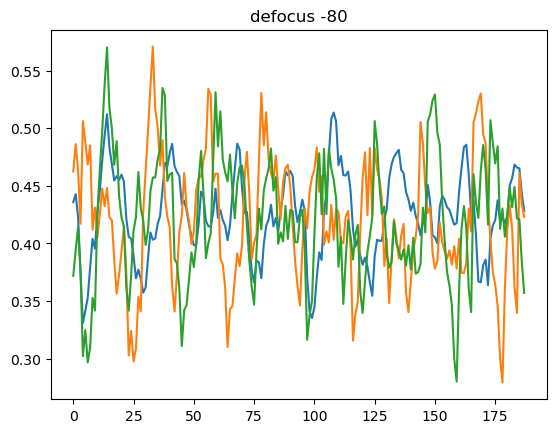

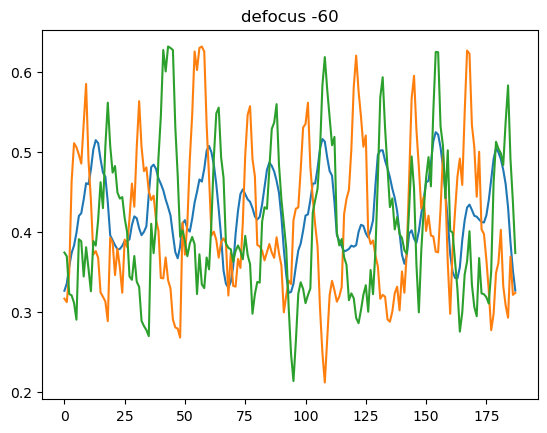

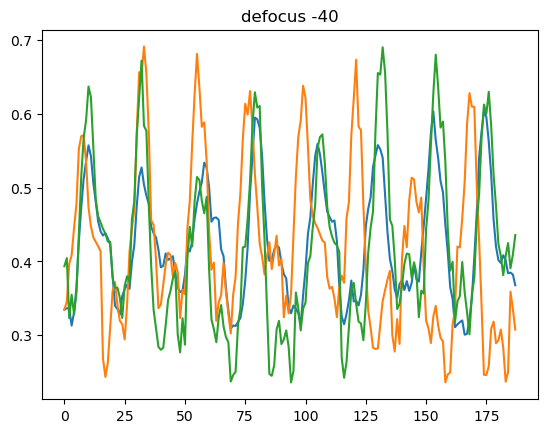

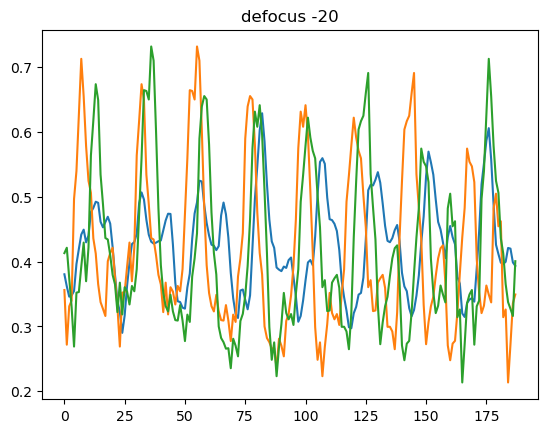

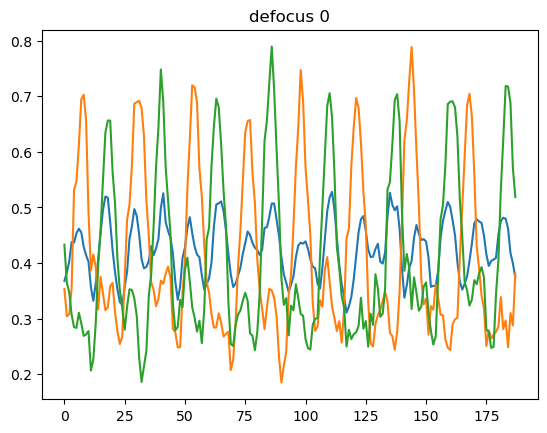

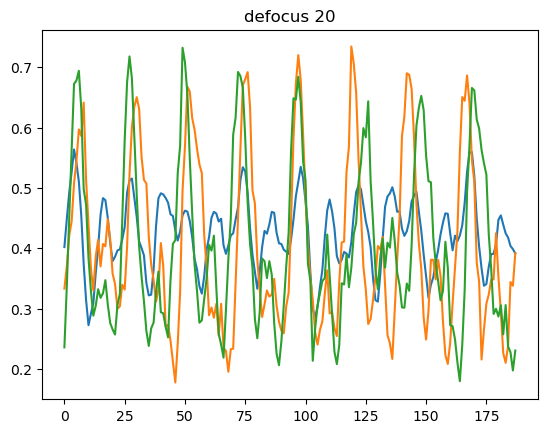

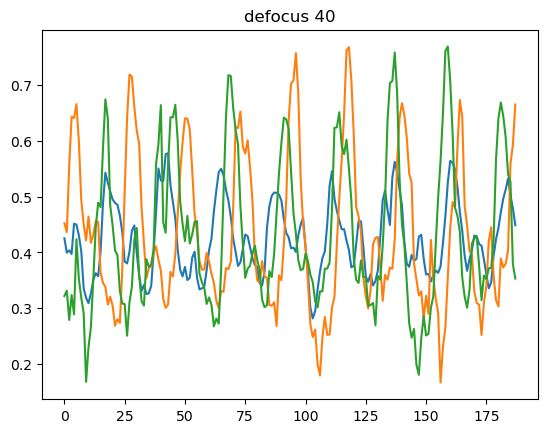

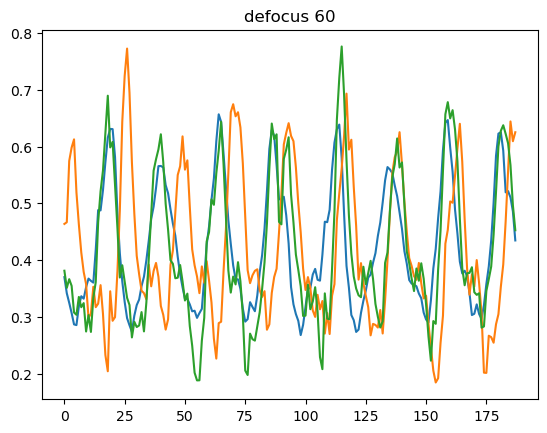

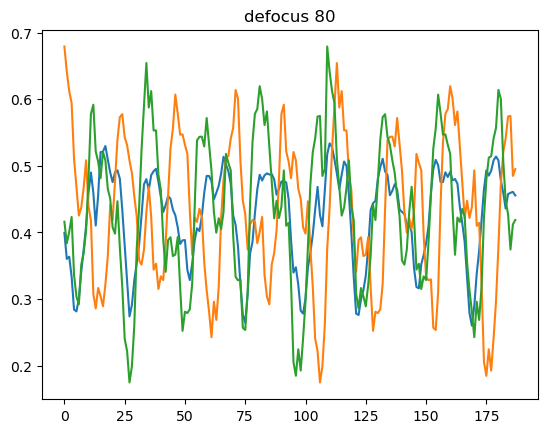

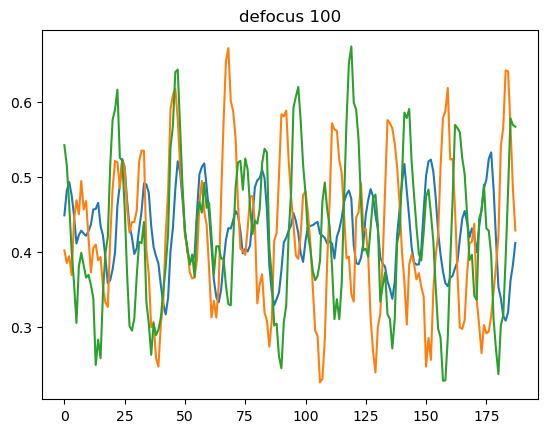

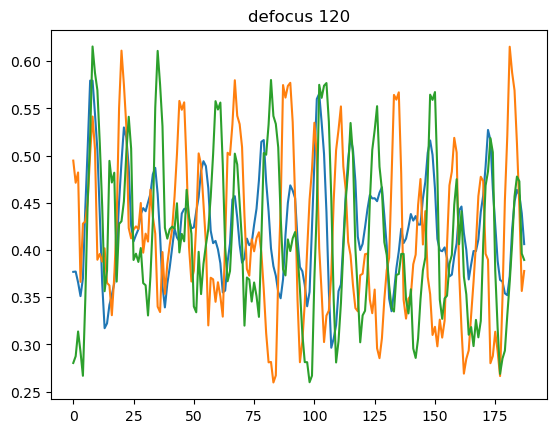

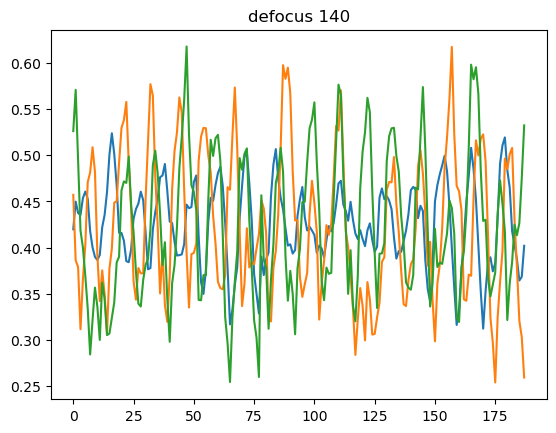

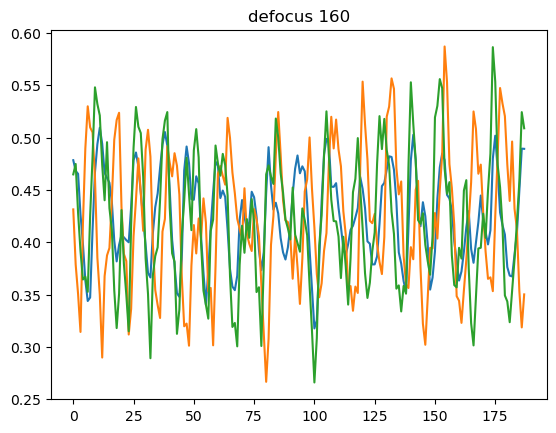

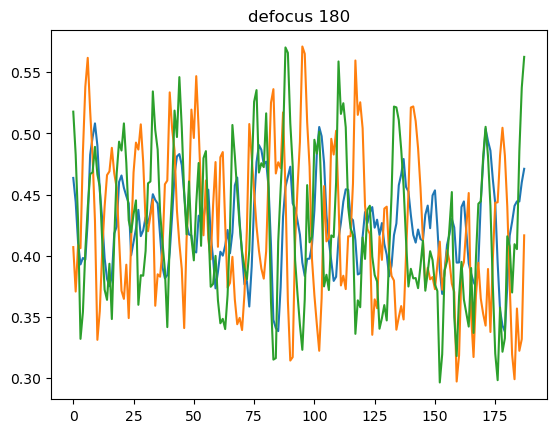

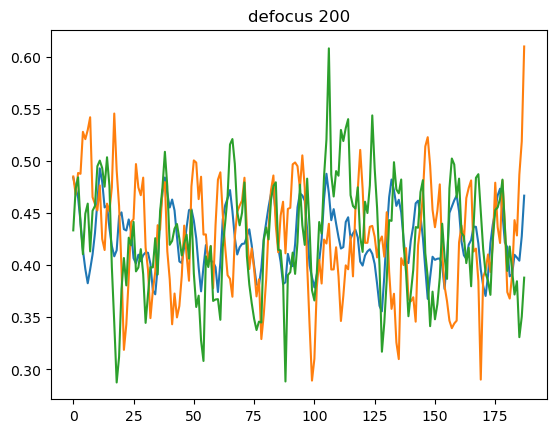

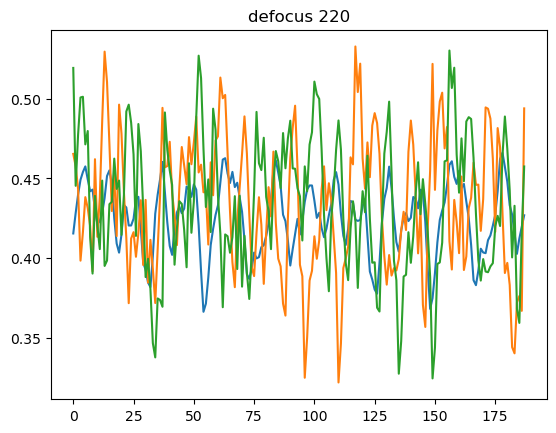

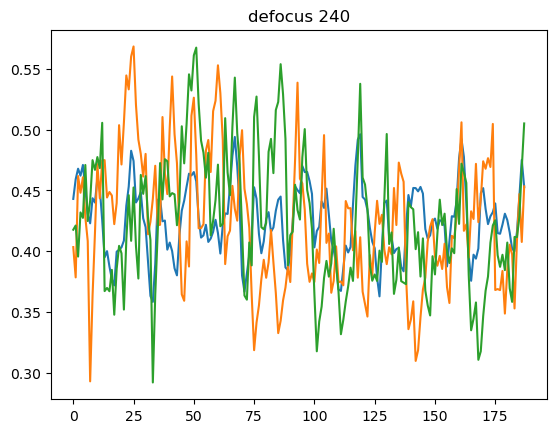

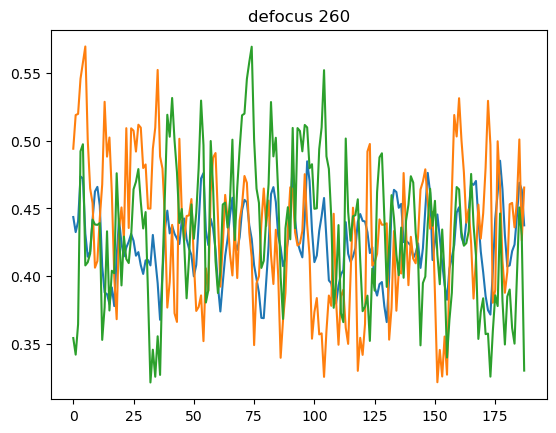

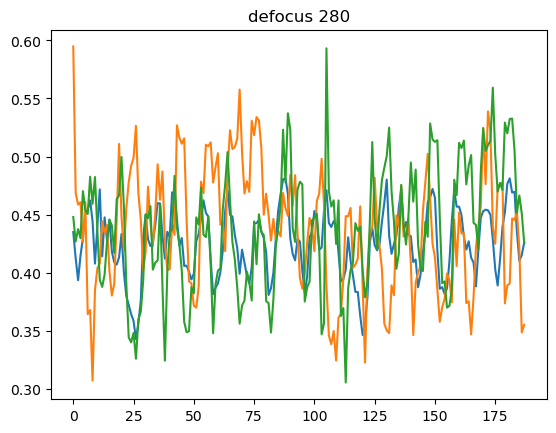

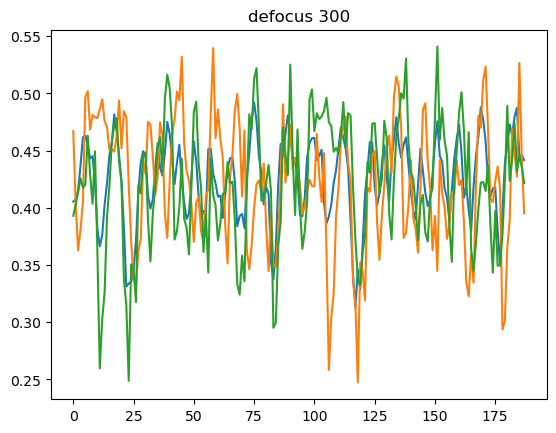

In [6]:
for index, df in enumerate(defocus):
    dm_prop = propagation_dm1d(dm_rec, df, energy, sampling)
    image_prop = intensity_profile(dm_prop)
    plt.plot(image_prop)
    plt.plot(focal_series[:,index])
    plt.plot(stack_1dp[:,index])
    plt.title(f"defocus {df}")
    plt.show()

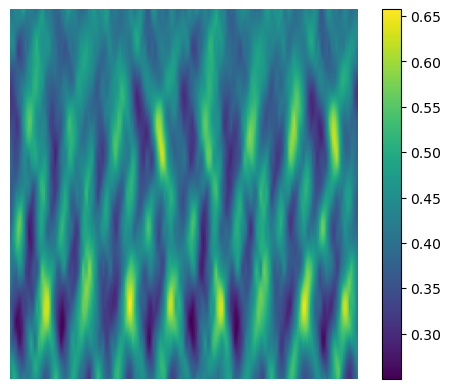

In [7]:
extend_defocus = np.arange(-100, 100, 1)
defocus_stack = []
for i, df in enumerate(extend_defocus):
    dm_prop = propagation_dm1d(dm_rec, df, energy, sampling)
    intensity = intensity_profile(dm_prop)
    #comparison = focal_series[:,i]
    defocus_stack.append(intensity)
defocus_stack = np.array(defocus_stack)
plt.imshow(defocus_stack)
plt.colorbar()
plt.axis("off")
plt.show()

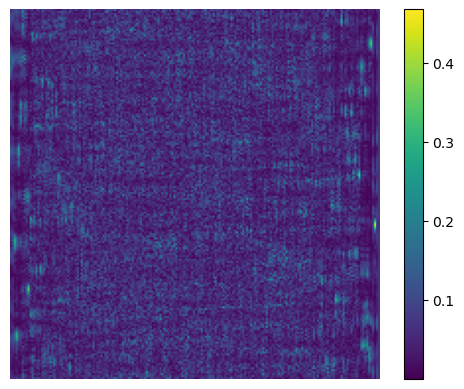

In [8]:
w, v = eigh(dm_rec)
plt.imshow(np.abs(v))
plt.colorbar()
plt.axis("off")
plt.show()

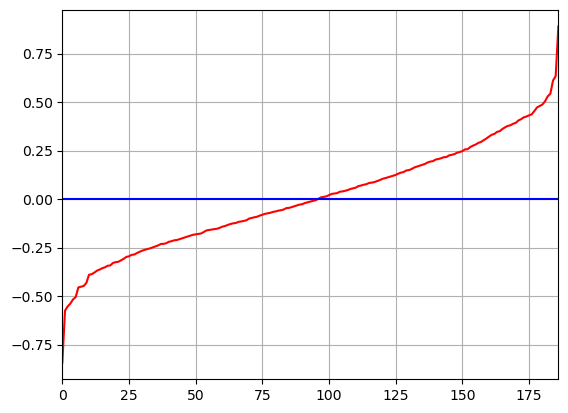

In [9]:
series = w[:-1]
plt.plot(series, color='r')
plt.plot(np.zeros(series.shape), color='b')
plt.xlim([0, series.shape[0]-1])
plt.grid()
plt.show()

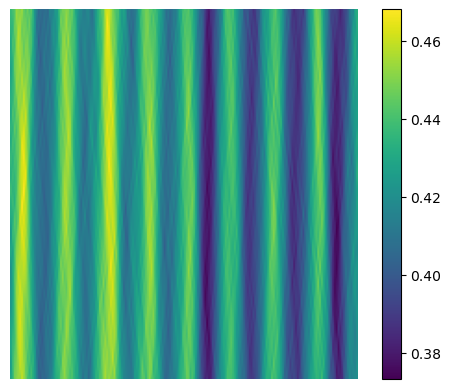

In [10]:
w, v = eigh(dm_rec)
index = -50
#w[:index] = 0; w[index+1:] = 0
w[:-1] = 0
dm_sel = v @ np.diag(w) @ v.conj().T

#extend_defocus = defocus
extend_defocus = np.arange(-100, 100, 1)
defocus_stack = []
for i, df in enumerate(extend_defocus):
    dm_prop = propagation_dm1d(dm_sel, df, energy, sampling)
    intensity = intensity_profile(dm_prop)
    #comparison = focal_series[:,i]
    defocus_stack.append(intensity)
defocus_stack = np.array(defocus_stack)
plt.imshow(defocus_stack)
plt.colorbar()
plt.axis("off")
plt.show()

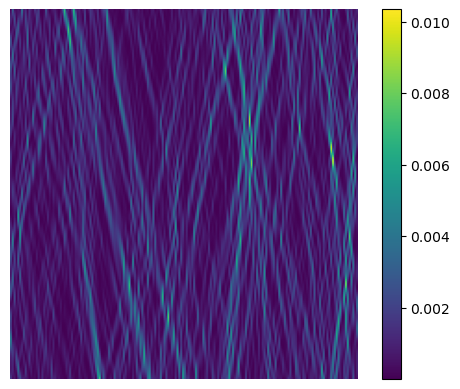

In [11]:
w, v = eigh(dm_rec)
index = -50
w[:index] = 0; w[index+1:] = 0
#w[:-1] = 0
dm_sel = v @ np.diag(w) @ v.conj().T

#extend_defocus = defocus
extend_defocus = np.arange(-100, 100, 1)
defocus_stack = []
for i, df in enumerate(extend_defocus):
    dm_prop = propagation_dm1d(dm_sel, df, energy, sampling)
    intensity = intensity_profile(dm_prop)
    #comparison = focal_series[:,i]
    defocus_stack.append(intensity)
defocus_stack = np.array(defocus_stack)
plt.imshow(defocus_stack)
plt.colorbar()
plt.axis("off")
plt.show()